## STACK

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('data/raw_data.csv')
data = data.drop('CustomerID', axis=1)
X = pd.DataFrame(data)

In [3]:
def get_categorical_indices(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    return [df.columns.get_loc(col) for col in categorical_columns]

In [4]:
categorical_indices = get_categorical_indices(X)

## IMPLEMENTATION

### First Steps

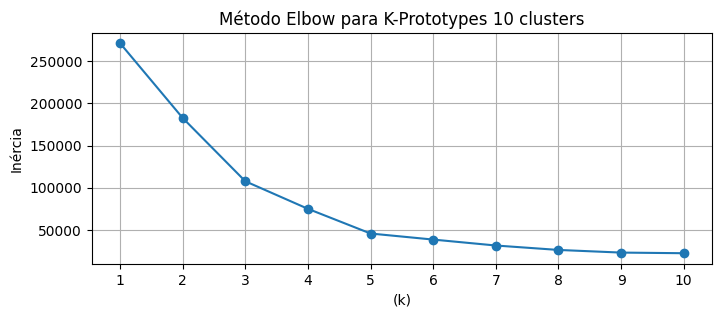

In [38]:
# Codificação One-Hot para variáveis categóricas
encoder = OneHotEncoder(sparse_output=False)
encoded_genre = encoder.fit_transform(X[['Genre']])
encoded_genre_X = pd.DataFrame(encoded_genre, columns=encoder.get_feature_names_out(['Genre']))

# Juntando dados codificados com variáveis numéricas
X_encoded = pd.concat([X.drop(columns=['Genre']), encoded_genre_X], axis=1)

# Função para calcular o custo (inércia) para diferentes valores de k
def calculate_inertia(X_encoded, max_k):
    inertia = []
    for k in range(1, max_k + 1):
        kproto = KPrototypes(n_clusters=k, init='Huang', verbose=0)
        kproto.fit_predict(X_encoded, categorical=categorical_indices)  # Adjust categorical index if needed
        inertia.append(kproto.cost_)
    return inertia

# Calculando inércia para valores de k
max_k = 10
inertia = calculate_inertia(X_encoded, max_k)

# Plotando o gráfico do método do cotovelo
plt.figure(figsize=(8, 3))
plt.plot(range(1, max_k + 1), inertia, marker='o')
plt.title(f'Método Elbow para K-Prototypes {max_k} clusters')
plt.title(f'
plt.xlabel('(k)')
plt.ylabel('Inércia')
plt.xticks(range(1, max_k + 1))  # Add this line to set x-axis ticks from 1 to 10
plt.grid(True)
plt.show()

__k: 20__ = 4, 5, 6
<br>
__K: 10__ = 4, 5   

In [37]:
print((4+5+6)/3)
print((4+5)/2)

5.0
4.5


## ++

In [ ]:
def impl_kprototypes(data, n_clusters, seed):
    model = KPrototypes(n_clusters=n_clusters, init='Cao', random_state=seed, n_init=45, max_iter=100)
    clusters = model.fit_predict(data, categorical=categorical_indices)
    return clusters, model.cluster_centroids_, model.cost_

# Definindo um intervalo de sementes
num_seeds = 5
seeds = np.random.choice(range(1, 100000), num_seeds, replace=False)

results = []

for seed in seeds:
    try:
        clusters, centroids, cost = impl_kprototypes(data, n_clusters=5, seed=seed)
        results.append((seed, clusters, centroids, cost))
    except Exception as e:
        print(f'Error while implematiion on seed {seed}: {e}')

# Exibir resultados em um DataFrame
results_df = pd.DataFrame(results, columns=['Seed', 'Clusters', 'Centroides', 'Cost'])

# Calcular estatísticas
mean_cost = results_df['Cost'].mean()
std_cost = results_df['Cost'].std()

print(results_df)
print(f"\nMédio de custo: {mean_cost:.4f}, Desvio-padrão do custo: {std_cost:.4f}")

X['cluster'] = clusters

                                            Centroids         Cost  
0  [[43.08860759493671, 55.29113924050633, 49.569...  76295.22974  

Médio de custo: 76295.2297, Desvio-padrão do custo: nan

In [ ]:
seeds = results_df['Seed']
seeds

In [ ]:
seeds.shape

In [ ]:
del(results_df)
X = X.drop('cluster', axis=1)

def impl_kprototypes2(data, n_clusters, seed):
    model = KPrototypes(n_clusters=n_clusters, init='Cao', random_state=seed, n_init=45, max_iter=100)
    clusters = model.fit_predict(data, categorical=categorical_indices)
    return clusters, model.cluster_centroids_, model.cost_

for seed in seeds:
    try:
        clusters, centroids, cost = impl_kprototypes2(data, n_clusters=5, seed=seed)
        results.append((seed, clusters, centroids, cost))
    except Exception as e:
        print(f'Error while implematiion on seed {seed}: {e}')

# Exibir resultados em um DataFrame
results_df = pd.DataFrame(results, columns=['Seed', 'Clusters', 'Centroides', 'Cost'])

# Calcular estatísticas
mean_cost = results_df['Cost'].mean()
std_cost = results_df['Cost'].std()

print(results_df)
print(f"\nMédio de custo: {mean_cost:.4f}, Desvio-padrão do custo: {std_cost:.4f}")

X['cluster'] = clusters

In [ ]:
ax = sns.countplot(x='cluster', data=X, hue='cluster', palette='colorblind_d')

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [ ]:
X

In [ ]:
sns.pairplot(X, hue='cluster', palette='colorblind_d') 

In [ ]:
sns.countplot(x='cluster', data=X, hue='cluster', palette='colorblind_d')